In [ ]:
import numpy as np

def obtenerCuadrante(punto, image):
    ancho_total = image.shape[1]
    alto_total = image.shape[0]
    x, y = punto[1], punto[0]  
    if x < ancho_total / 2 and y < alto_total / 2:
        #superior izquierda
        return 2
    elif x >= ancho_total / 2 and y < alto_total / 2:
        #superior derecha
        return 1
    elif x < ancho_total / 2 and y >= alto_total / 2:
        #inferior izquierda
        return 3
    elif x >= ancho_total / 2 and y >= alto_total / 2:
        #inferior derecha
        return 4
    else:
        return "No se encuentra en ningún cuadrante"
    
def primer1(contorno):
    for i in range(contorno.shape[0]):
        for j in range(contorno.shape[1]):
            if contorno[i, j] == 1:
                return(i, j)
        else:
            continue
        
# Modificación de la función FreemanChain
def FreemanChain(imgBinaria, conexion):
    start = primer1(imgBinaria)  # No se proporciona la función primer1, deberías reemplazarla por tu propia implementación
    print(start)
    currentP = start
    chainResult = []
    border = [start]  # Se inicia con el primer punto en el borde
    result = np.zeros_like(imgBinaria)
    result[start] = 1
    if conexion == 8:
        directions = [3, 2, 1, 
                      4,    0,
                      5, 6, 7] 
        movimiento = [(-1, -1),(-1, 0),(-1, 1),
                       (0, -1),         (0,1),
                       (1, -1),(1, 0), (1, 1)]
        direc1 = [2, 1, 0, 7, 6, 5, 4, 3]
        movs1 = [(-1, 0),(-1, 1),(0,1), (1,1),(1, 0), (1, -1),(0, -1),(-1, -1)]
        direc4 =[0, 7,6,5,4,3,2,1]
        movs4 = [(0,1), (1, 1), (1, 0),(1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1)]
        direc3 =[6, 5, 4, 3, 2, 1, 0, 7] 
        movs3 = [(1, 0),(1, -1),(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1)] 
        direc2 = [4, 3, 2, 1, 0, 7, 6, 5]
        movs2 = [(0, -1),(-1, -1),(-1, 0),(-1, 1), (0,1),(1, 1), (1, 0),(1, -1)]   
        pass
    elif conexion == 4:
        directions = [   1, 
                      2,    0,
                         3] 
        movimiento = [     (-1, 0),
                    (0, -1),      (0,1),
                            (1, 0)]
        direc1 = [1, 0, 3, 2]
        movs1 = [(-1,0), (0,1), (1,0), (0, -1)]
        direc4 = [0, 3, 2, 1]
        movs4 = [(0,1), (1, 0), (0, -1), (-1, 0)]
        direc3 = [3,2,1,0]
        movs3 = [(1,0), (0, -1), (-1,0), (0,1)]
        direc2 =[2,1,0, 3]
        movs2 = [(0, -1), (-1,0), (0,1), (1,0)]
        pass
    
    dicc1 = dict(zip(direc1, movs1))
    dicc2 = dict(zip(direc2, movs2))
    dicc3 = dict(zip(direc3, movs3))
    dicc4 = dict(zip(direc4, movs4))
    cuadrante = obtenerCuadrante(currentP, imgBinaria)
    diccActual = dicc1.copy()
    consecutive_empty_moves = 0
    llego = False
    while True:
        added_to_chain = False
        for direction, mov in diccActual.items():
            next_mov = (currentP[0] + mov[0], currentP[1] + mov[1])
            if 0 <= next_mov[0] < imgBinaria.shape[0] and 0 <= next_mov[1] < imgBinaria.shape[1]:
                if imgBinaria[next_mov] == 1 and result[next_mov] != 0 and next_mov == start:
                    print('forzamos termino ')
                    llego = True
                if imgBinaria[next_mov] == 1 and result[next_mov] == 0:
                    border.append(next_mov)  # Agregar el punto al borde
                    chainResult.append(direction)
                    result[next_mov] = 1  # Marcar solo el punto en el borde en el resultado
                    currentP = next_mov
                    added_to_chain = True
                    consecutive_empty_moves = 0
                    '''plt.imshow(result, cmap='binary')
                    plt.grid(True)
                    plt.xticks(np.arange(0.5, result.shape[1]+0.5, 1))
                    plt.yticks(np.arange(0.5, result.shape[0]+0.5, 1))
                    plt.show()'''
                    break
                else:
                    consecutive_empty_moves += 1
        if consecutive_empty_moves > 10 or llego:
            break
        else:
            cuadrante = obtenerCuadrante(currentP, imgBinaria)
            if cuadrante == 1:
                diccActual = dicc1
            elif cuadrante == 4:
                diccActual = dicc3
            elif cuadrante == 3:
                diccActual = dicc3
            elif cuadrante == 2:
                diccActual = dicc1
    return chainResult, border

In [ ]:
chainCircle, borderCircle = FreemanChain(binary, 8)
replaceColor(masked, borderCircle, (255,0,0))

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from general import rgb2gray
from general import alpha2rgb
from segmentacion.otsu import thresholdOtsu
from formas_binarias import detectar_bordes_binarios
from bordes import primer1
from bordes import replaceColor
from formas_binarias import FreemanChain

image2 = cv2.imread('imagenesPruebas/circle1.png')
imgGray = rgb2gray(image2)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image2)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image2.shape[1]):
    for j in range(image2.shape[0]):
        if 1-binary[j, i] == 0:
            masked[j, i, :] = image2[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image2)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segmentacion.globalT import thresholdingGlobal
from formas_binarias import etiquetas_c
from Clasificadores import KmeansComplete
from Clasificadores import elbow_method
import os
from segmentacion import region_growing

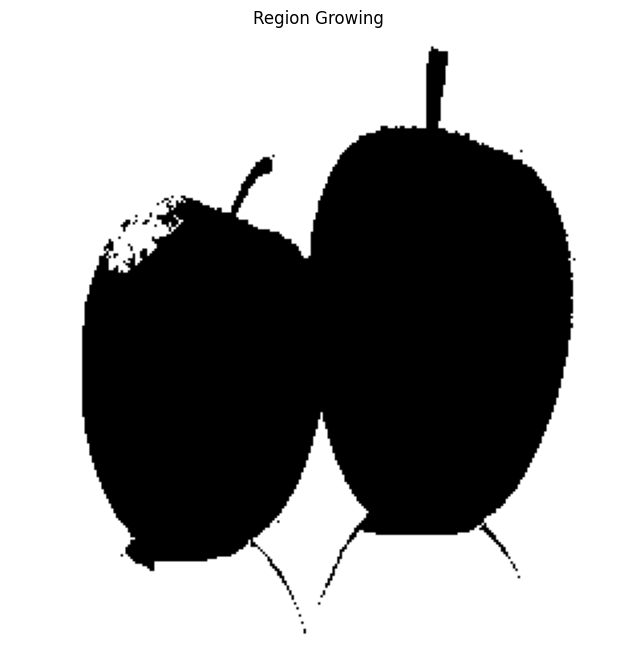

In [15]:
image = cv2.imread('apple.jpg', 0)
threshold = 5
region_growing(image, threshold)

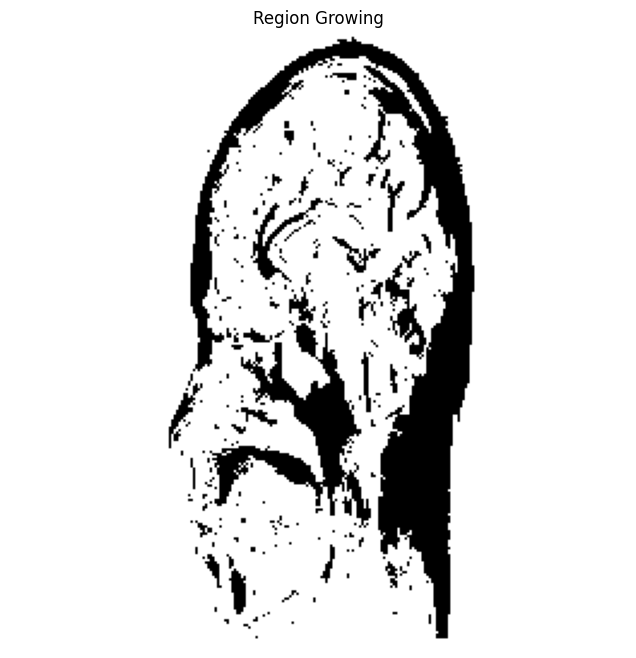

In [4]:
image = cv2.imread('mri.jpg', 0)
threshold = 12
region_growing(image, threshold)

In [14]:
imagen = cv2.imread('imagenesPruebas/Kmeans.png')
img = np.array(imagen)

In [15]:
print(img.shape)
imgRecortada = img[:580,:,:]

(963, 693, 3)


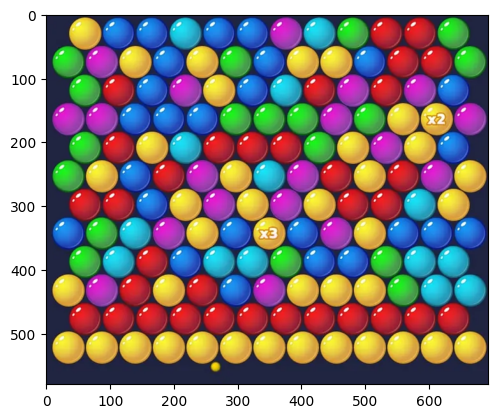

In [16]:
plt.imshow(cv2.cvtColor(imgRecortada, cv2.COLOR_BGR2RGB))

In [17]:
def rgb2grayInverse(rgb):
    return np.dot(rgb[..., :3], [0.114, 0.587, 0.299]).astype(np.uint8)

In [18]:
from segmentacion.bernsen import Bernsen
img = np.array(imgRecortada)
imggrayI= rgb2grayInverse(img)
globalX = thresholdingGlobal(imggrayI, 26)
globalXI = globalX
plt.imshow(globalXI, cmap ='gray')

KeyboardInterrupt: 

[(103, 84, 228), (10, 124, 135), (199, 179, 109), (240, 137, 108), (199, 150, 244), (197, 254, 203), (158, 18, 249), (28, 61, 213), (111, 137, 70), (36, 157, 119), (92, 149, 239), (87, 120, 159), (20, 123, 170), (92, 227, 47), (28, 244, 213), (218, 90, 185), (4, 155, 144), (109, 211, 201), (43, 205, 55), (140, 79, 140), (233, 131, 154), (164, 219, 206), (68, 177, 8), (100, 53, 189), (85, 221, 225), (67, 188, 34), (224, 190, 111), (227, 93, 57), (164, 4, 148), (69, 74, 168), (77, 32, 163), (40, 125, 22), (254, 18, 74), (219, 97, 25), (65, 226, 42), (179, 100, 111), (248, 87, 37), (189, 153, 234), (249, 151, 47), (87, 188, 148), (11, 255, 4), (170, 202, 171), (92, 148, 128), (227, 98, 96), (160, 216, 132), (229, 171, 189), (43, 123, 241), (139, 1, 42), (66, 33, 138), (69, 133, 121), (101, 183, 177), (96, 115, 38), (148, 237, 116), (188, 209, 155), (125, 205, 95), (194, 198, 23), (44, 22, 8), (231, 78, 136), (53, 14, 28), (77, 67, 110), (195, 66, 149), (121, 190, 40), (35, 44, 63), (78, 2

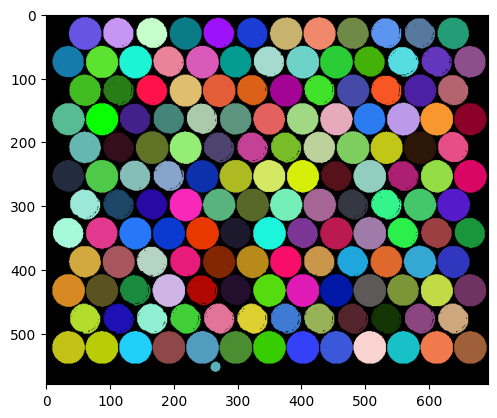

In [ ]:
colors, numcolors = etiquetas_c(globalXI)
colors = np.array(colors)
plt.imshow(colors)
print(numcolors)
print(len(numcolors))

In [ ]:
prom = np.zeros((len(numcolors), 3))
colors = np.array(colors)

for num in range(len(numcolors)):
    mask = np.all(colors == numcolors[num], axis=2)
    count = np.sum(mask)
    if count > 0:
        imgRecortada_masked = imgRecortada * mask[:, :, np.newaxis]
        prom[num, :3] = np.sum(imgRecortada_masked, axis=(0, 1)) / count

print(prom)
print(prom.shape)   

[[ 65.03152279 188.44810863 221.37196896]
 [200.50226017 175.07835259  37.78252135]
 [181.55405405  52.5980981  174.3988989 ]
 [200.02205514 174.83659148  37.71478697]
 [208.05791284 108.82798165  37.40481651]
 [208.16552119 108.96334479  37.63860252]
 [208.40470723 109.10447761  37.61825488]
 [208.12107367 108.93318104  37.81324957]
 [ 57.74894958 185.8644958   54.56932773]
 [ 57.66351706 185.34435696  54.68346457]
 [ 49.30486358  38.19928826 191.66192171]
 [ 49.18842292  38.57590077 190.96042528]
 [ 57.59241706 186.07214323  54.5150079 ]
 [182.23366834  52.70703518 175.34824121]
 [ 65.46407767 187.97669903 221.62427184]
 [ 65.45379377 188.61381323 222.13570039]
 [ 57.48165618 185.74475891  54.3663522 ]
 [ 65.3685742  188.13094083 221.27303589]
 [ 65.02719767 188.42399223 221.69208354]
 [ 57.58372703 185.78425197  54.52650919]
 [207.99139908 109.14908257  37.39105505]
 [208.30264672 109.21864212  37.35212888]
 [208.46127367 109.04417671  37.59781985]
 [ 49.31761194  38.57492537 191.66

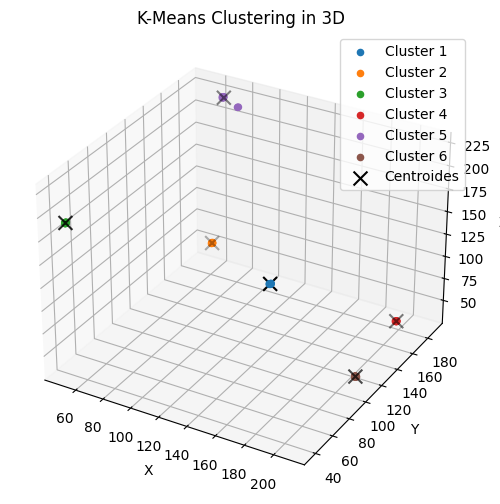

Centroide 1: [181.77200406053962, 52.62747039447293, 174.80558234003584]
Puntos en el cluster 1: [[181.55405405405406, 52.5980980980981, 174.3988988988989], [182.23366834170855, 52.7070351758794, 175.34824120603014], [181.86037167252636, 52.86388749372175, 174.83626318432948], [182.1695935775213, 52.53687907676869, 175.1329653788259], [181.51833249623306, 52.427925665494726, 174.52687091913612], [181.68856569709126, 52.699097291875624, 174.95235707121364], [181.95130522088354, 52.721385542168676, 174.83232931726909], [181.63231615807905, 52.82541270635318, 174.68484242121062], [181.09573934837093, 52.51929824561404, 174.7984962406015], [181.57328664332167, 52.5647823911956, 174.75487743871935], [181.4206827309237, 52.44226907630522, 174.77911646586347], [181.66649974962445, 52.608913370055085, 174.7691537305959], [181.5889724310777, 52.5609022556391, 174.8110275689223], [182.12694430506772, 52.68138484696438, 174.88359257400904], [182.4199698946312, 52.65629703963874, 175.2187656798795

In [34]:
newProm = KmeansComplete(prom, 6)

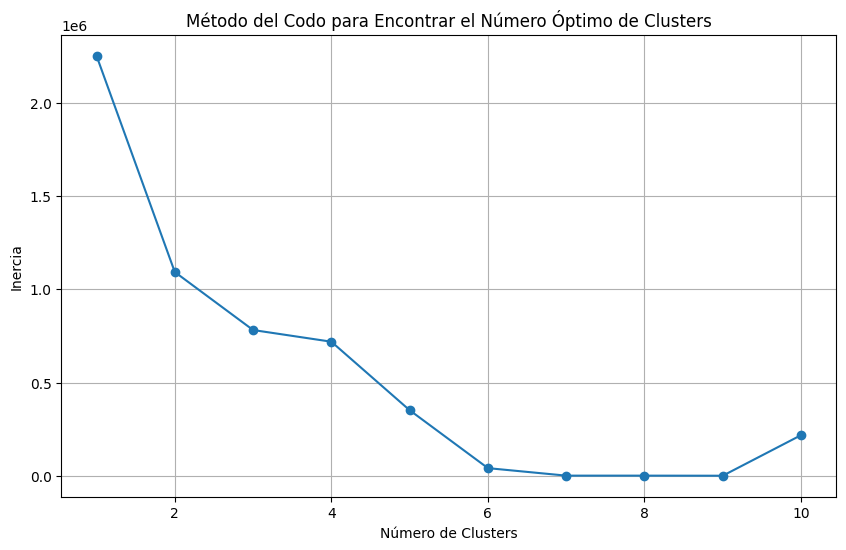

In [35]:
elbow_method(prom.tolist(), 10) 

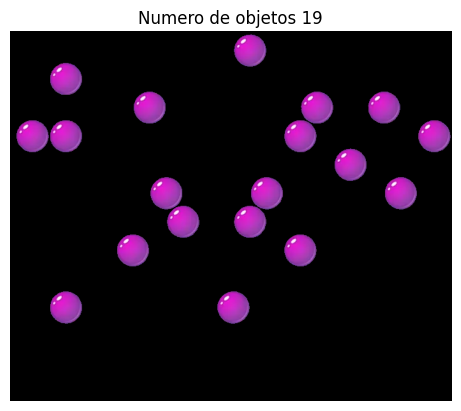

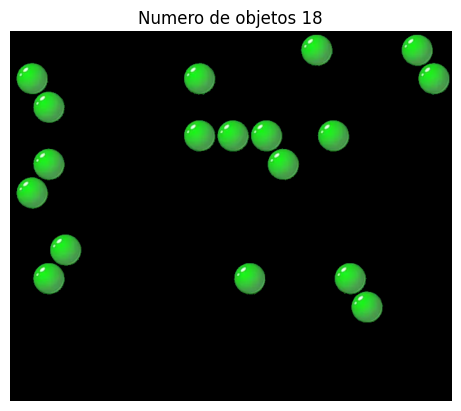

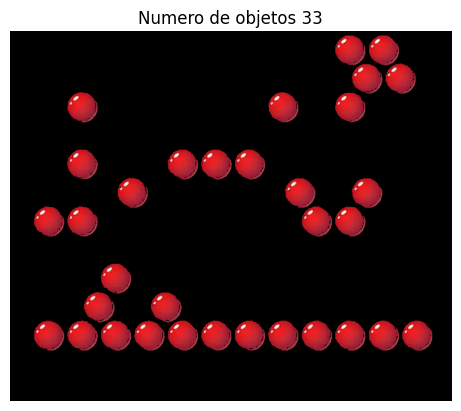

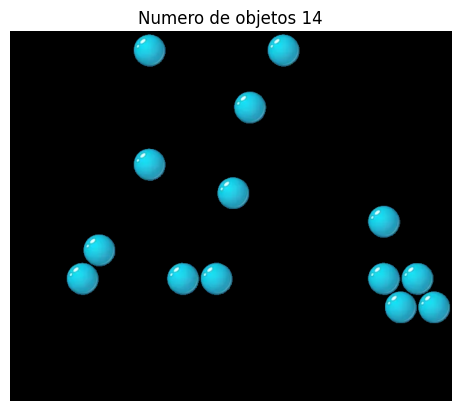

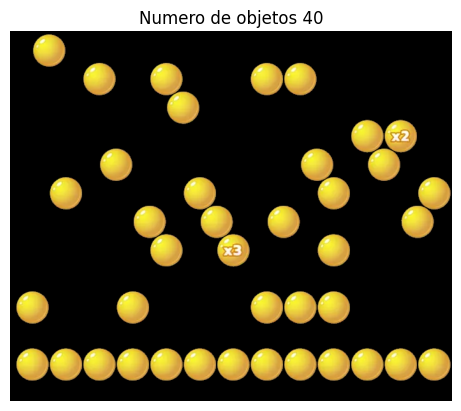

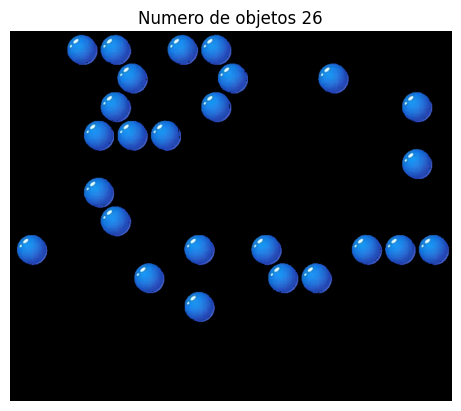

In [37]:
folder_path = "ResultadosKmeans" 

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

for i in range(0, 6):
    result = [elemento for elemento in newProm if elemento[1] == i]
    newImage = np.zeros_like(imgRecortada)
    for elemento in result:
        colorAct = numcolors[elemento[2]]
        for x in range(imgRecortada.shape[1]):
            for y in range(imgRecortada.shape[0]):
                if np.all(colors[y, x, :] == colorAct[:]):
                    newImage[y, x, :] = imgRecortada[y, x, :]
                    
    plt.imshow(cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB))
    plt.title('Numero de objetos '+ str(len(result)))
    plt.axis('off') 
    plt.savefig(os.path.join(folder_path, f'ResultadoKmeans_{i}.png')) 
    plt.show()
    #print(result)